# Realistic Loan Approval Dataset | US & Canada


In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# For Classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Make graphs look nice
plt.style.use('seaborn-v0_8-whitegrid')


In [4]:
Loan_df = pd.read_csv("Loan_approval_data_2025_ModelReady.csv")

In [5]:
Loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          50000 non-null  int64  
 1   age                                  50000 non-null  int64  
 2   occupation_status                    50000 non-null  int64  
 3   years_employed                       50000 non-null  float64
 4   annual_income                        50000 non-null  int64  
 5   credit_score                         50000 non-null  int64  
 6   credit_history_years                 50000 non-null  float64
 7   savings_assets                       50000 non-null  int64  
 8   current_debt                         50000 non-null  int64  
 9   defaults_on_file                     50000 non-null  int64  
 10  delinquencies_last_2yrs              50000 non-null  int64  
 11  derogatory_marks            

In [6]:
Loan_df.columns

Index(['customer_id', 'age', 'occupation_status', 'years_employed',
       'annual_income', 'credit_score', 'credit_history_years',
       'savings_assets', 'current_debt', 'defaults_on_file',
       'delinquencies_last_2yrs', 'derogatory_marks', 'product_type',
       'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio',
       'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status',
       'future_net_worth', 'current_debt_to_current_asset_ratio',
       'current_asset_to_current_debt_ratio', 'increase_in_debt',
       'all_debt_to_all_asset_ratio', 'all_asset_to_all_debt_ratio',
       'payment_made', 'total_interest_due_on_loan', 'interest_over_payment',
       'credit_score_per_age', 'credit_score_per_history',
       'age_started_using_credit', 'age_started_at_current_work',
       'working_credit_years', 'penalty_score_card'],
      dtype='object')

In [7]:
Loan_df.duplicated().sum()

np.int64(0)

In [8]:
Loan_df.shape

(50000, 35)

In [9]:
Loan_df.describe()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,...,all_asset_to_all_debt_ratio,payment_made,total_interest_due_on_loan,interest_over_payment,credit_score_per_age,credit_score_per_history,age_started_using_credit,age_started_at_current_work,working_credit_years,penalty_score_card
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,34.957060,0.397580,7.454868,50062.892040,643.614820,8.168274,3595.619400,14290.442220,0.053480,...,0.095066,11013.752126,5003.327613,0.465064,20.297252,353.288712,26.788786,27.502192,-0.713406,4.341080
std,14433.901067,11.118603,0.658421,7.612097,32630.501014,64.731518,7.207552,13232.399398,13243.757493,0.224991,...,0.407745,8705.366079,4061.663242,0.122178,6.642885,816.742104,8.579910,8.686835,8.092862,8.159755
min,0.000000,18.000000,0.000000,0.000000,15000.000000,348.000000,0.000000,0.000000,60.000000,0.000000,...,0.000000,148.176000,71.300000,0.180268,6.910448,0.000000,16.000000,16.000000,-29.600000,0.000000
25%,12499.750000,26.000000,0.000000,1.300000,27280.500000,600.000000,2.000000,130.000000,5581.000000,0.000000,...,0.003802,4100.316250,1704.982500,0.365574,15.315789,51.077809,20.000000,20.600000,-4.500000,0.000000
50%,24999.500000,35.000000,0.000000,4.900000,41607.500000,643.000000,6.100000,568.000000,10385.000000,0.000000,...,0.015591,8689.170000,3797.935000,0.463164,18.638889,102.301387,24.600000,25.300000,-0.600000,0.000000
75%,37499.250000,43.000000,1.000000,11.400000,62723.250000,687.000000,12.600000,2271.000000,18449.250000,0.000000,...,0.059449,16159.476750,7473.045000,0.566501,23.806762,305.889037,31.400000,32.225000,2.800000,5.000000
max,49999.000000,70.000000,2.000000,39.900000,250000.000000,850.000000,30.000000,300000.000000,163344.000000,1.000000,...,26.374356,33409.624000,17000.000000,0.758895,46.166667,8180.000000,69.900000,69.600000,38.500000,56.000000


In [10]:
Loan_df.head()

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,...,all_asset_to_all_debt_ratio,payment_made,total_interest_due_on_loan,interest_over_payment,credit_score_per_age,credit_score_per_history,age_started_using_credit,age_started_at_current_work,working_credit_years,penalty_score_card
0,0,40,0,17.2,25579,692,5.3,895,10820,0,...,0.078371,204.632,102.12,0.499042,17.300000,130.566038,34.7,22.8,11.9,0
1,1,33,0,7.3,43087,627,3.5,169,16550,0,...,0.002419,17751.844,7515.30,0.423353,19.000000,179.142857,29.5,25.7,3.8,5
2,2,42,2,1.1,20840,689,8.4,17,7852,0,...,0.001708,708.560,384.93,0.543257,16.404762,82.023810,33.6,40.9,-7.3,0
3,3,53,2,0.5,29147,692,9.8,1480,11603,0,...,0.102048,961.851,543.46,0.565015,13.056604,70.612245,43.2,52.5,-9.3,5
4,4,32,0,12.5,63657,630,7.2,209,12424,0,...,0.001866,33228.954,13864.32,0.417236,19.687500,87.500000,24.8,19.5,5.3,0


In [11]:
Loan_df.isnull().sum()

customer_id                            0
age                                    0
occupation_status                      0
years_employed                         0
annual_income                          0
credit_score                           0
credit_history_years                   0
savings_assets                         0
current_debt                           0
defaults_on_file                       0
delinquencies_last_2yrs                0
derogatory_marks                       0
product_type                           0
loan_intent                            0
loan_amount                            0
interest_rate                          0
debt_to_income_ratio                   0
loan_to_income_ratio                   0
payment_to_income_ratio                0
loan_status                            0
future_net_worth                       0
current_debt_to_current_asset_ratio    0
current_asset_to_current_debt_ratio    0
increase_in_debt                       0
all_debt_to_all_

In [12]:
Loan_df.dtypes

customer_id                              int64
age                                      int64
occupation_status                        int64
years_employed                         float64
annual_income                            int64
credit_score                             int64
credit_history_years                   float64
savings_assets                           int64
current_debt                             int64
defaults_on_file                         int64
delinquencies_last_2yrs                  int64
derogatory_marks                         int64
product_type                             int64
loan_intent                              int64
loan_amount                              int64
interest_rate                          float64
debt_to_income_ratio                   float64
loan_to_income_ratio                   float64
payment_to_income_ratio                float64
loan_status                              int64
future_net_worth                         int64
current_debt_

In [13]:
Loan_df['loan_status'].value_counts()


loan_status
1    27523
0    22477
Name: count, dtype: int64

In [14]:
Loan_df['loan_status'].value_counts(normalize=True)* 100

loan_status
1    55.046
0    44.954
Name: proportion, dtype: float64

In [15]:
# Separate numeric and categorical columns
num_cols = Loan_df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = Loan_df.select_dtypes(include=["object"]).columns.tolist()

print("Numerical columns:")
print(num_cols)
print("\nCategorical columns:")
print(cat_cols)

Numerical columns:
['customer_id', 'age', 'occupation_status', 'years_employed', 'annual_income', 'credit_score', 'credit_history_years', 'savings_assets', 'current_debt', 'defaults_on_file', 'delinquencies_last_2yrs', 'derogatory_marks', 'product_type', 'loan_intent', 'loan_amount', 'interest_rate', 'debt_to_income_ratio', 'loan_to_income_ratio', 'payment_to_income_ratio', 'loan_status', 'future_net_worth', 'current_debt_to_current_asset_ratio', 'current_asset_to_current_debt_ratio', 'increase_in_debt', 'all_debt_to_all_asset_ratio', 'all_asset_to_all_debt_ratio', 'payment_made', 'total_interest_due_on_loan', 'interest_over_payment', 'credit_score_per_age', 'credit_score_per_history', 'age_started_using_credit', 'age_started_at_current_work', 'working_credit_years', 'penalty_score_card']

Categorical columns:
[]


In [18]:
print(len(num_cols))

35


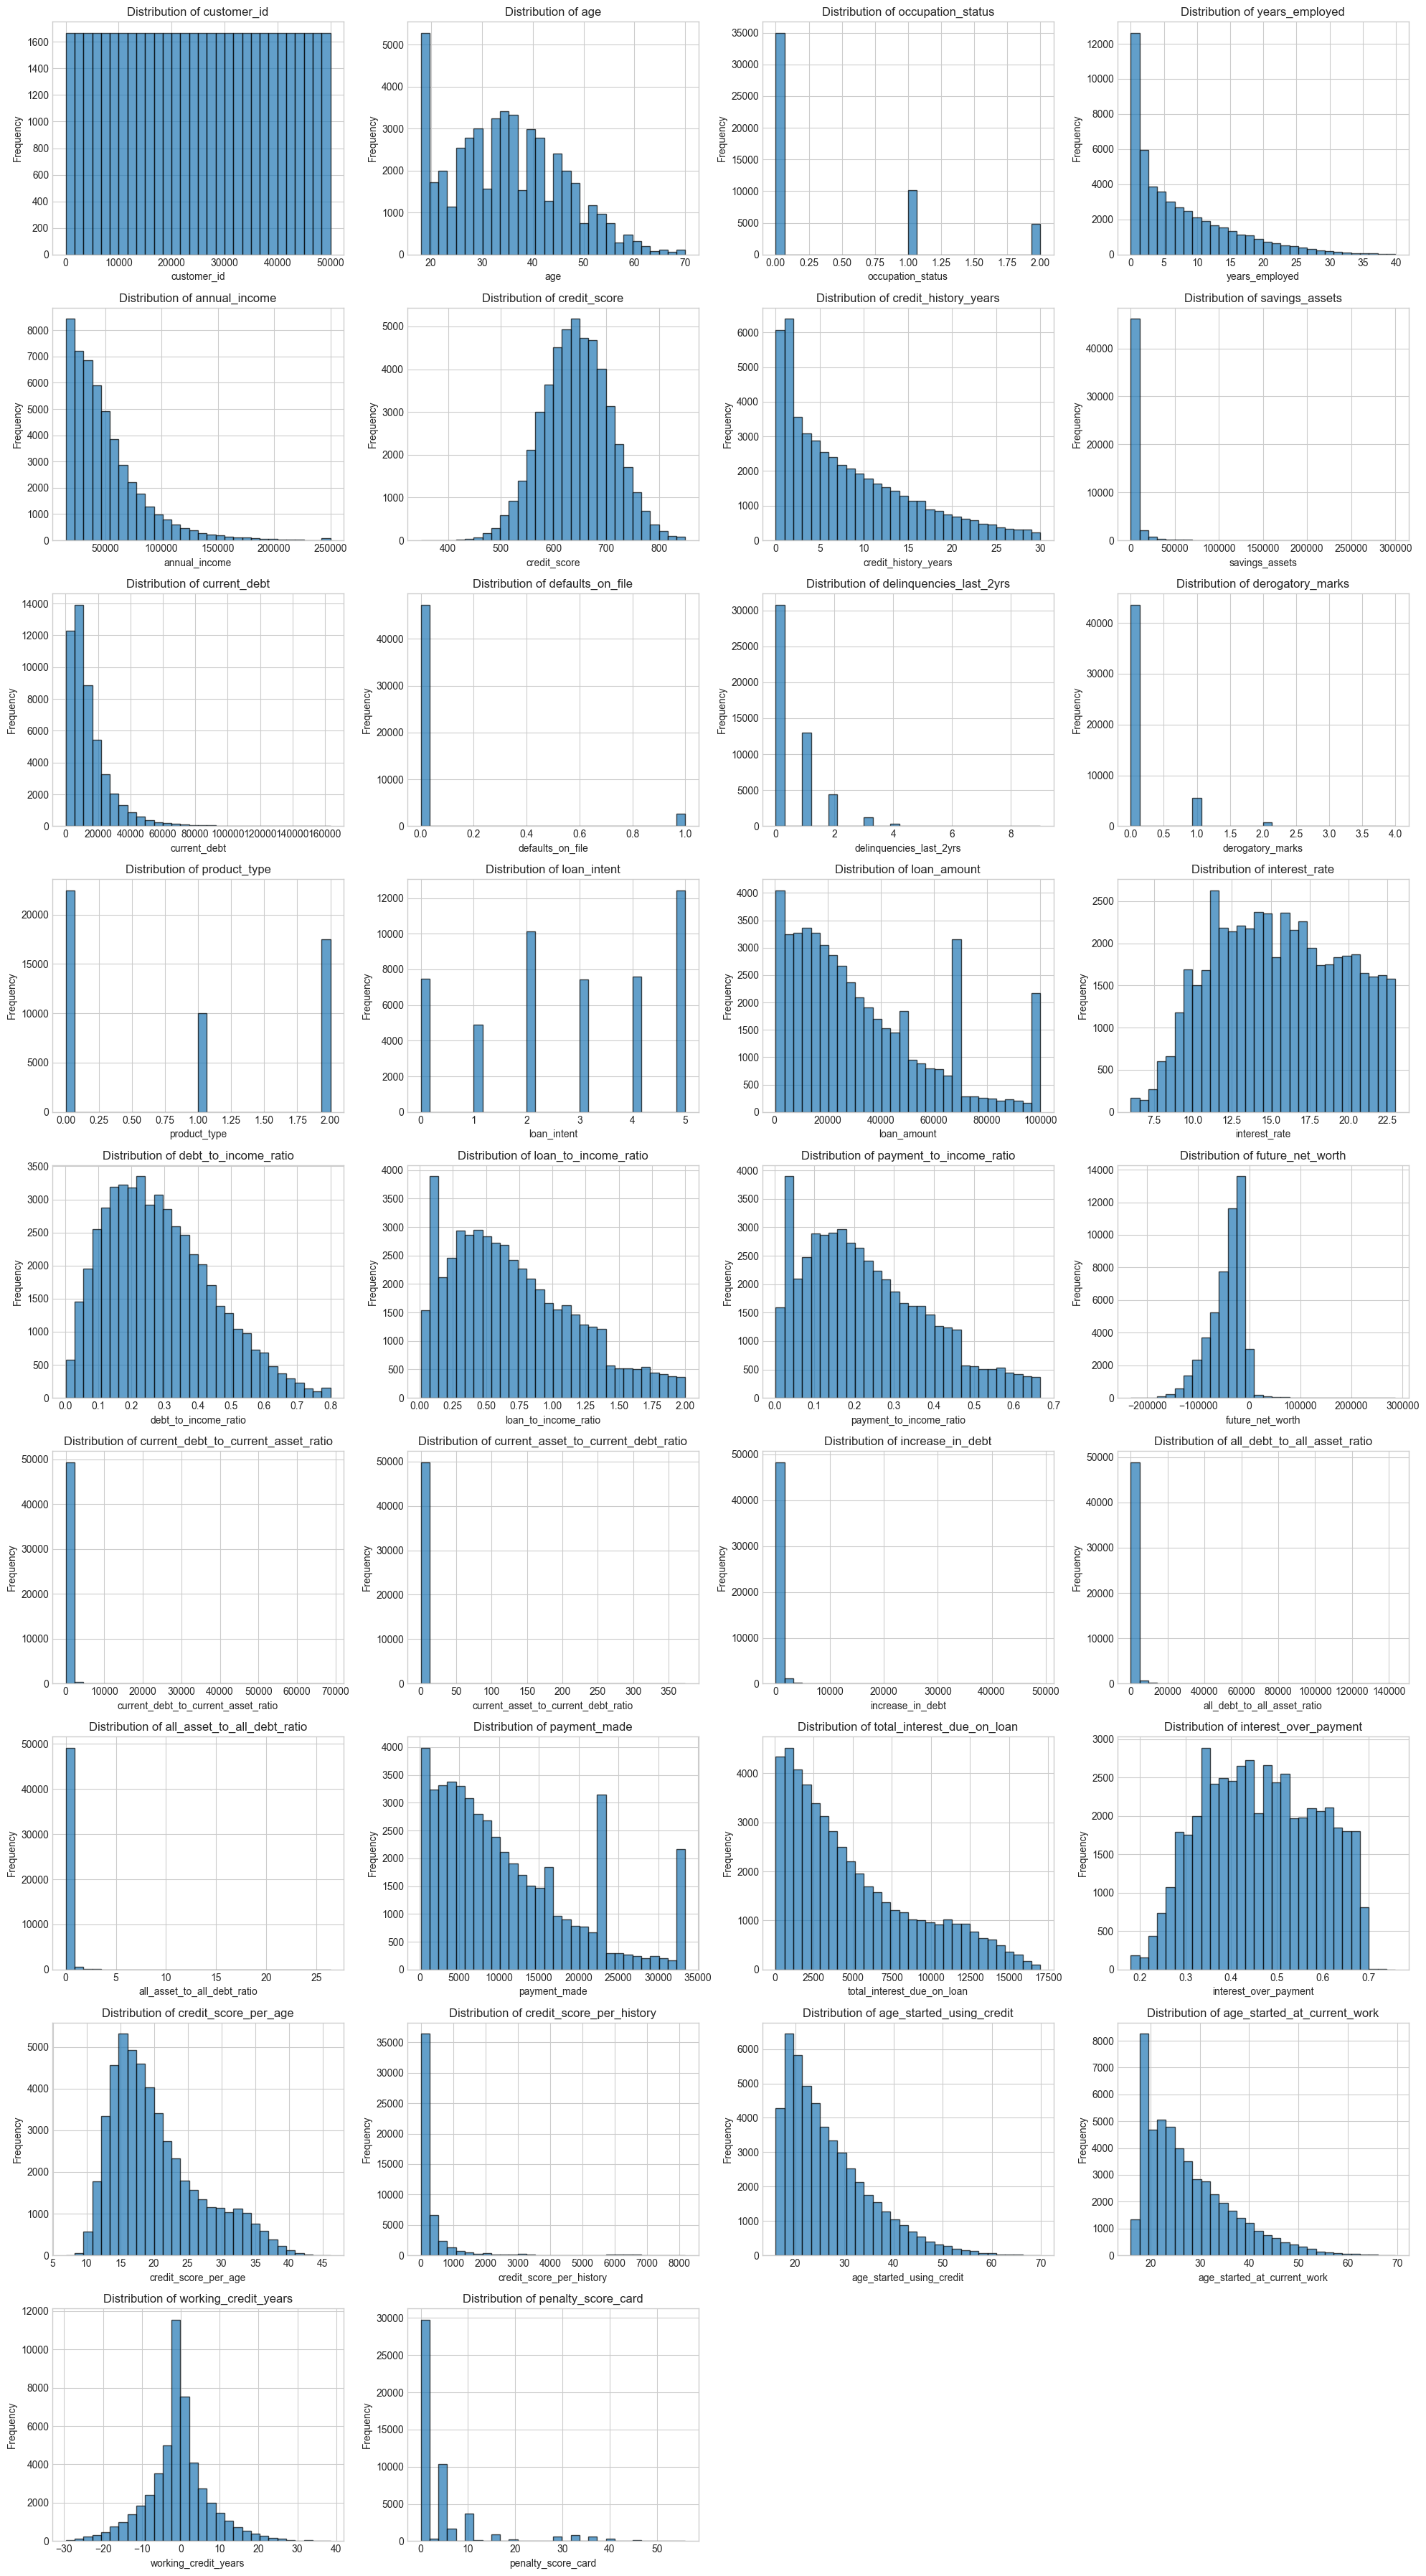

In [ ]:
# Distribution of numerical features
numerical_cols = Loan_df.select_dtypes(include=['int64', 'float64']).columns.drop('loan_status')

num_cols = len(numerical_cols)   # 34
cols = 4                        # plots per row
rows = int(np.ceil(num_cols / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 4))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    axes[i].hist(Loan_df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove extra empty plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

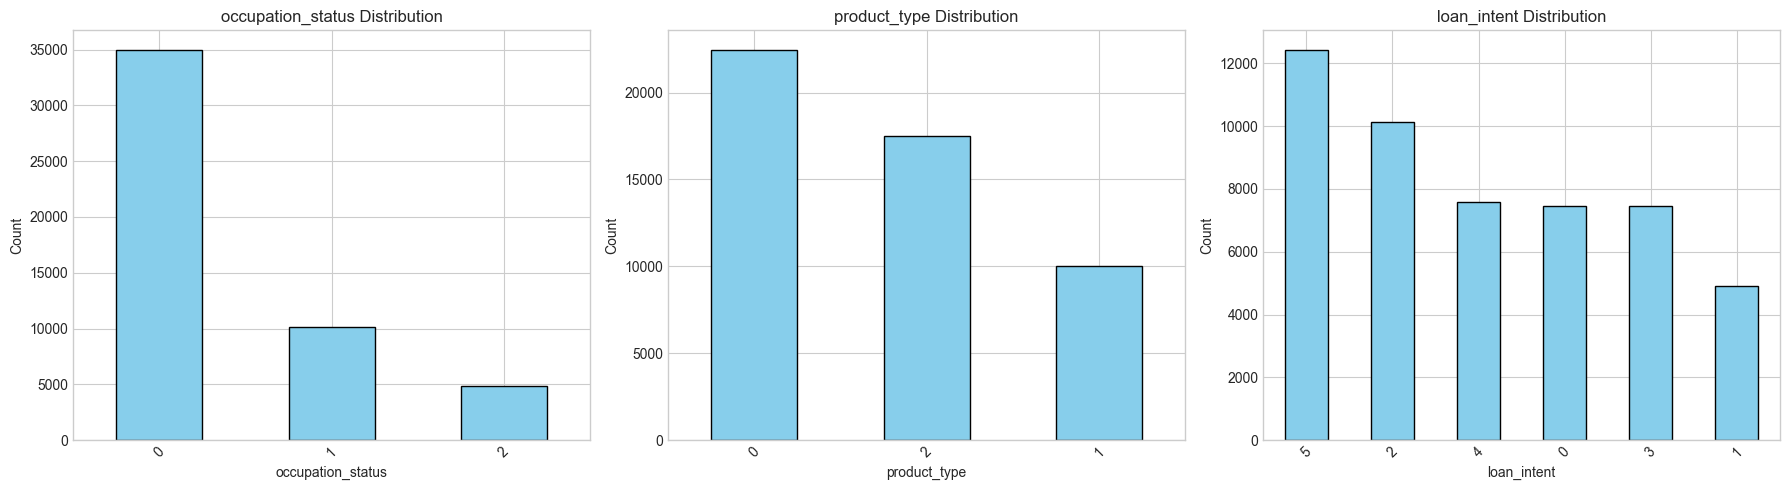

In [ ]:
# Categorical columns
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols):
    Loan_df[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'{col} Distribution')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
print(len(categorical_cols))


3


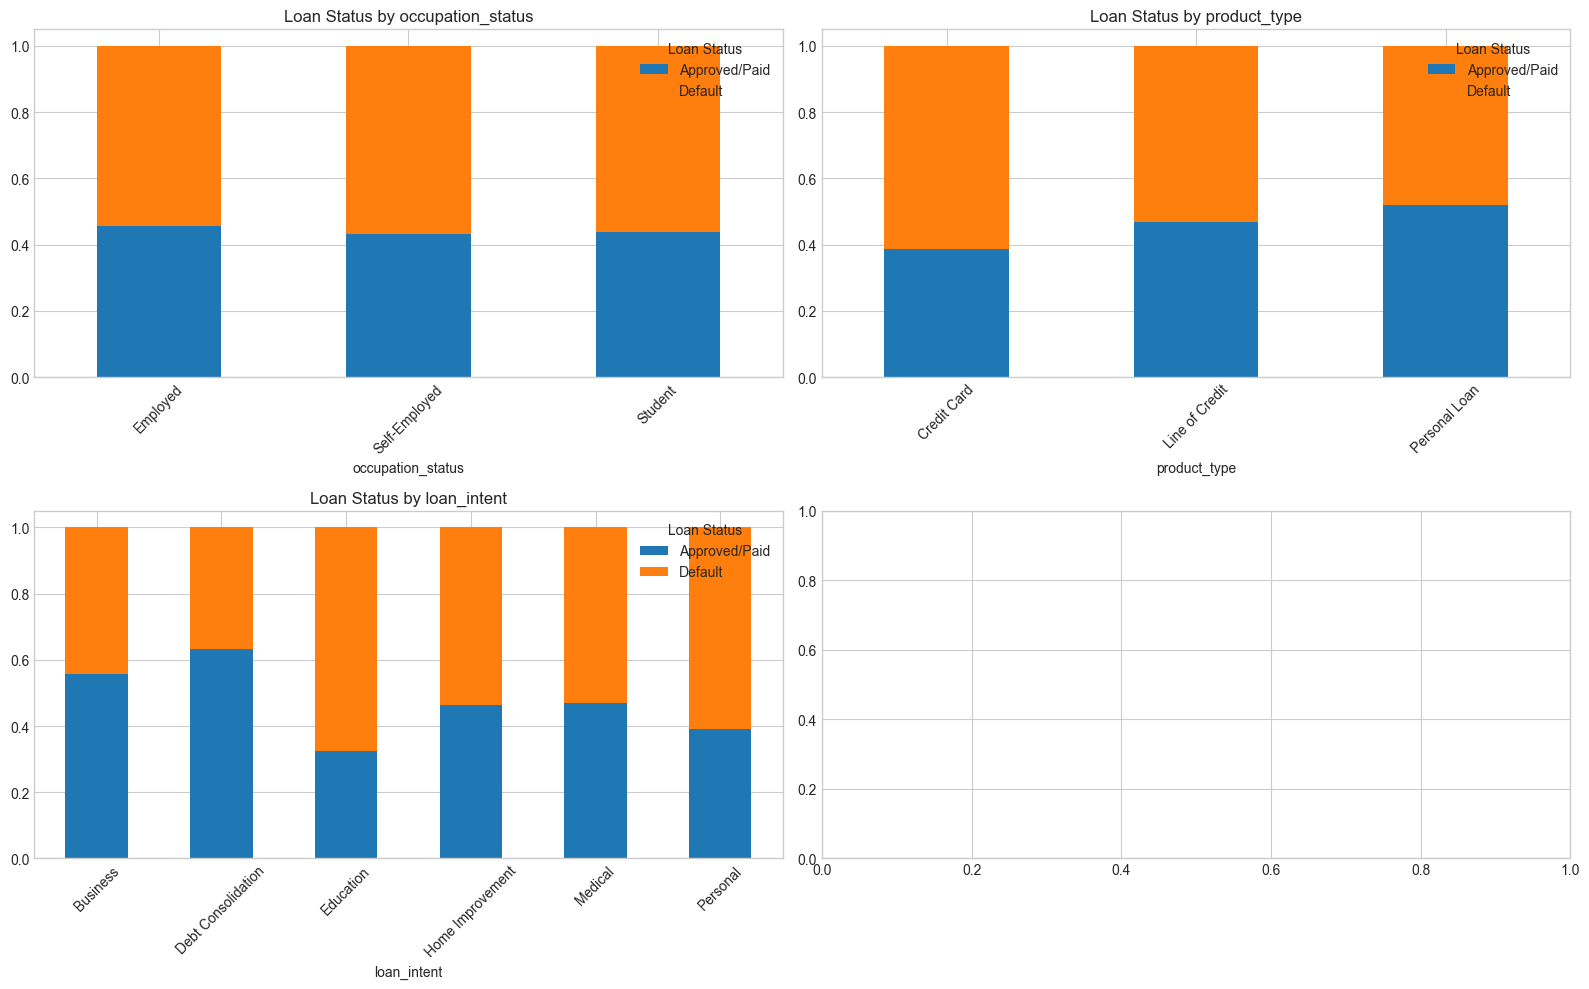

In [ ]:
# Loan status by categorical features
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    pd.crosstab(Loan_df[col], Loan_df['loan_status'], normalize='index').plot(
        kind='bar', ax=axes[i], stacked=True
    )
    axes[i].set_title(f'Loan Status by {col}')
    axes[i].legend(['Approved/Paid', 'Default'], title='Loan Status')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
# Compute Pearson correlation matrix for numeric features
corr_matrix = Loan_df[num_cols].corr(method="pearson")

# Show top of the matrix
corr_matrix.head()

,age,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
age,1.000000,0.626840,0.264814,0.369271,0.636136,0.177699,0.179684,-0.063810,-0.101463,-0.098710,0.172352,-0.187963,-0.009043,-0.039339,-0.039345,0.311524
years_employed,0.626840,1.000000,0.235926,0.235266,0.404618,0.129377,0.161998,-0.041415,-0.063597,-0.065559,0.185206,-0.123444,-0.004341,0.018162,0.018173,0.218875
annual_income,0.264814,0.235926,1.000000,0.185058,0.164144,0.203323,0.698170,-0.038113,-0.051635,-0.044766,0.511129,-0.093371,-0.002630,-0.138318,-0.138306,0.158466
credit_score,0.369271,0.235266,0.185058,1.000000,0.236862,0.080091,0.126314,-0.188593,-0.284155,-0.267832,0.112019,-0.493183,-0.004806,-0.019248,-0.019241,0.496316
credit_history_years,0.636136,0.404618,0.164144,0.236862,1.000000,0.257595,0.113377,-0.045024,-0.063997,-0.064447,0.107280,-0.123866,-0.001180,-0.024801,-0.024807,0.277103


In [ ]:
# Find pairs of features with high absolute correlation

# Flatten the correlation matrix into pairs

# Create the correlation matrix

corr_matrix = Loan_df.corr(numeric_only=True)

corr_pairs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .reset_index()
)

corr_pairs.columns = ["feature_1", "feature_2", "correlation"]

threshold = 0.8
high_corr_pairs = corr_pairs[
    abs(corr_pairs["correlation"]) >= threshold
].sort_values(by="correlation", ascending=False)

print(f"Highly correlated feature pairs (|corr| >= {threshold}):\n")
print(high_corr_pairs)


Highly correlated feature pairs (|corr| >= 0.8):

                               feature_1                    feature_2  \
442                 loan_to_income_ratio      payment_to_income_ratio   
396                          loan_amount                 payment_made   
417                        interest_rate        interest_over_payment   
397                          loan_amount   total_interest_due_on_loan   
559                         payment_made   total_interest_due_on_loan   
294                     defaults_on_file           penalty_score_card   
506  current_debt_to_current_asset_ratio  all_debt_to_all_asset_ratio   
496                     future_net_worth   total_interest_due_on_loan   
495                     future_net_worth                 payment_made   
390                          loan_amount             future_net_worth   
61                                   age         credit_score_per_age   

     correlation  
442     0.999998  
396     0.999998  
417     0.999676

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy df to avoid warnings
X_encoded = Loan_df.copy()

# Encode each categorical column
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(Loan_df[col])
    label_encoders[col] = le




=== occupation_status – approval rate by category ===
occupation_status
1    0.569113
2    0.561031
0    0.543565
Name: loan_status, dtype: float64


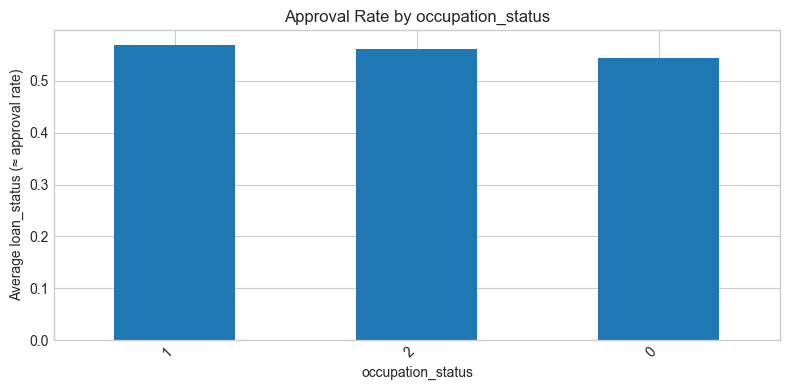


=== product_type – approval rate by category ===
product_type
0    0.613226
1    0.532429
2    0.480340
Name: loan_status, dtype: float64


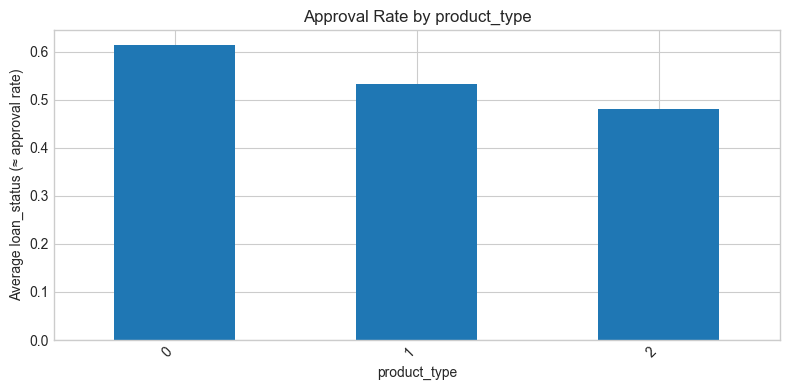


=== loan_intent – approval rate by category ===
loan_intent
2    0.675054
5    0.608255
3    0.535221
4    0.528955
0    0.443433
1    0.366484
Name: loan_status, dtype: float64


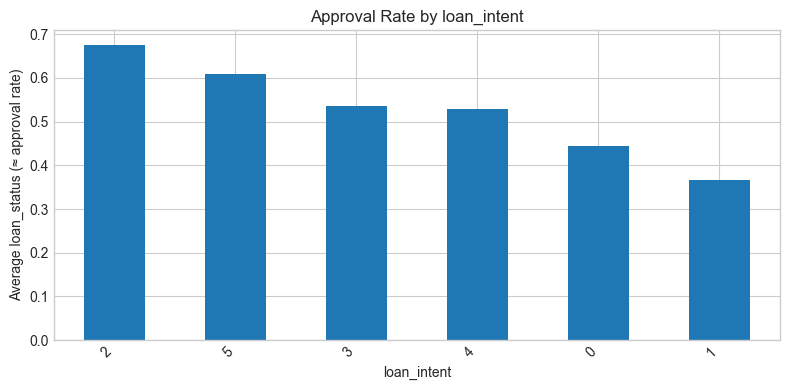

In [ ]:
# Approval rate by category for each categorical column

for col in categorical_cols:
    print(f"\n=== {col} – approval rate by category ===")
    rates = Loan_df.groupby(col)["loan_status"].mean().sort_values(ascending=False)
    print(rates)

    # Optional bar plot
    plt.figure(figsize=(8, 4))
    rates.plot(kind="bar")
    plt.ylabel("Average loan_status (≈ approval rate)")
    plt.title(f"Approval Rate by {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


In [21]:

# Create correlation matrix from Loan_df
corr_matrix = Loan_df.select_dtypes(include=['int64', 'float64']).corr()

# Create correlation series with target
loan_corr = corr_matrix['loan_status'].sort_values(ascending=False)


# Select top numeric features by absolute correlation with target
k = 10  # number of top features you want
loan_corr_no_self = loan_corr.drop(labels=["loan_status"])
top_features = loan_corr_no_self.abs().sort_values(ascending=False).head(k)
print(f"Top {k} numeric features by correlation with loan_status:\n")
print(top_features)

Top 10 numeric features by correlation with loan_status:

credit_score                   0.496316
penalty_score_card             0.368684
delinquencies_last_2yrs        0.318075
debt_to_income_ratio           0.317363
age                            0.311524
credit_history_years           0.277103
defaults_on_file               0.263033
derogatory_marks               0.224735
years_employed                 0.218875
age_started_at_current_work    0.206935
Name: loan_status, dtype: float64


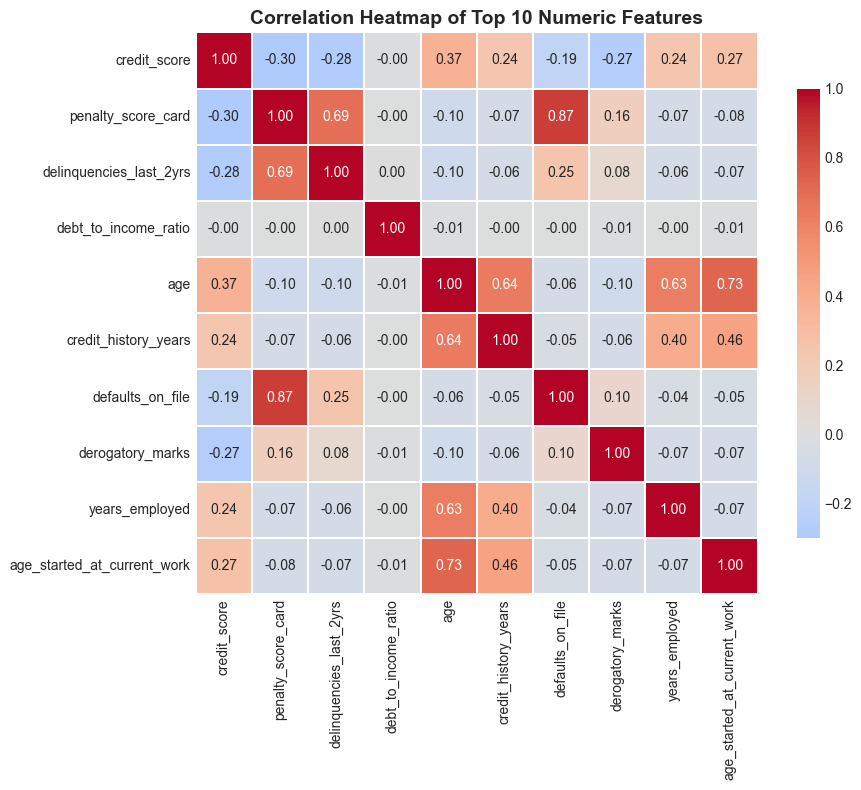

In [22]:
# Top 10 Numeric Features by Absolute Correlation with Loan Status
# Select top K feature names
top_feature_names = top_features.index

# Subset correlation matrix for top features + target
top_corr_matrix = corr_matrix.loc[top_feature_names, top_feature_names]

plt.figure(figsize=(10, 8))
sns.heatmap(
    top_corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.3,
    cbar_kws={"shrink": 0.8}
)

plt.title(f"Correlation Heatmap of Top {k} Numeric Features", 
          fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


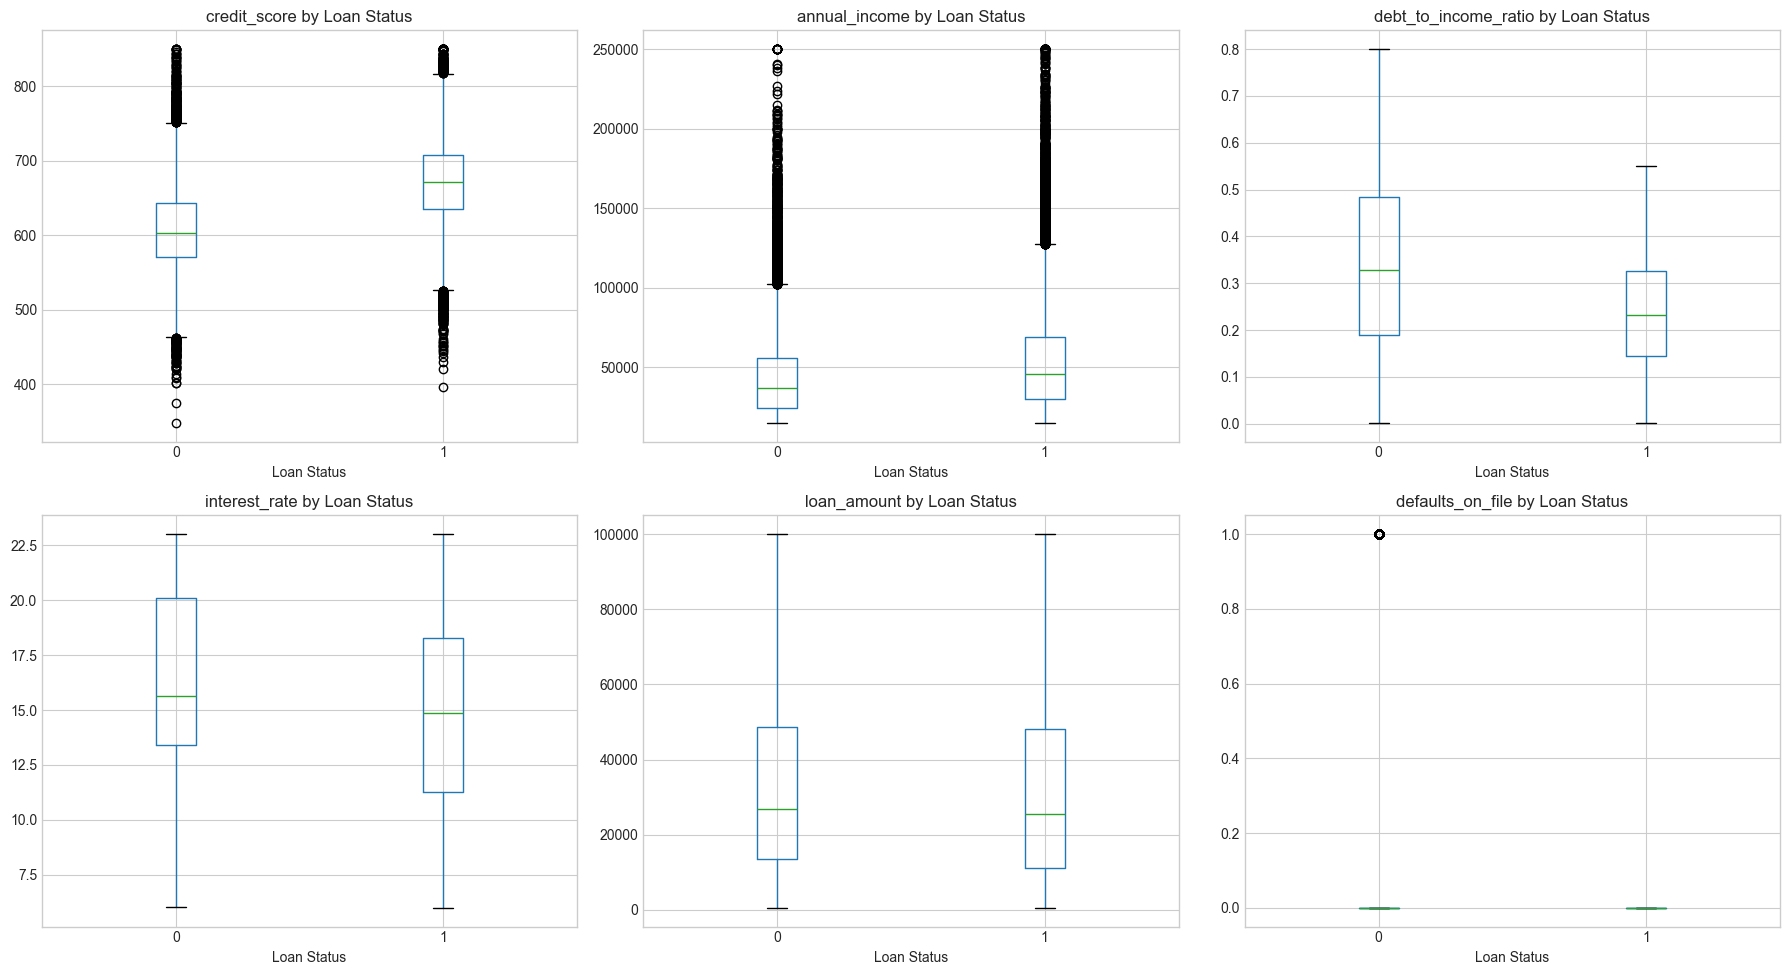

In [ ]:
# Boxplots for key features by loan status
key_features = ['credit_score', 'annual_income', 'debt_to_income_ratio', 
                'interest_rate', 'loan_amount', 'defaults_on_file']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(key_features):
    Loan_df.boxplot(column=col, by='loan_status', ax=axes[i])
    axes[i].set_title(f'{col} by Loan Status')
    axes[i].set_xlabel('Loan Status')

plt.suptitle('')
plt.tight_layout()
plt.show()